Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [240]:
NAME = "Sunsun Kasajoo"
ID = "st122283"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

### Example 1: Root finding for a cubic polynomial

Let's begin by using Newton's method to find roots of a simple cubic
polynomial $$ f(x) = x^3 + x^2 .$$

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Here's a function to evaluate a polynomial created with Numpy's `poly1d` function
at a particular point $x$:

In [242]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

And here's some code to create the polynomial $x^3 + x^2$, get its derivative, and evalute
the derivative at 200 points along the $x$ axis:;

In [243]:
# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [1 * x^3, 1 * x^2, 0 * x^1, 0 * 1]

# Get f'(x) (the derivative of f(x) in polynomial form)
# We know it's 2x^2 + 2x, which is [3, 2, 0] in poly1d form
p_d = np.polyder(p)

print('f(x):')
print('----------')
print(p)
print('----------')
print("f'(x):")
print('----------')
print(p_d)
print('----------')

# Get 200 points along the x axis between -3 and 3
n = 200
x = np.linspace(-3, 3, n)  

# Get values for f(x) and f'(x) in order to graph them later
y = fx(x, p)
y_d = fx(x,p_d)

f(x):
----------
   3     2
1 x + 1 x
----------
f'(x):
----------
   2
3 x + 2 x
----------


Next, let's try three possible guesses for $x_0$: -3, 1, and 3, and in each case, run
Newton's root finding method from that initial guess.

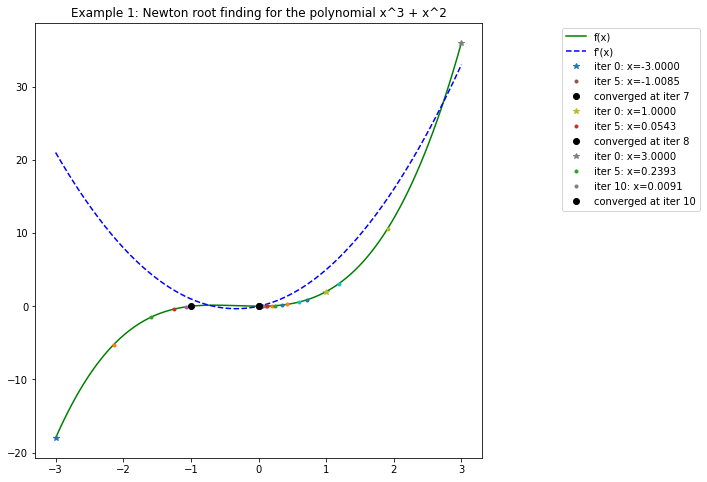

In [244]:
# Initial guesses
x0_arr = [-3.0, 1.0, 3.0]

# Parameters for Newton: number of iterations,
# threshold for identifying a point as a zero
max_iters = 30
threshold = 0.0001

# Set up plot
fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f'(x)")

roots = []
for x0 in x0_arr:
    i = 0
    xi = x0
    fxi = fx(xi, p)
    # Plot initial data point
    plt.plot(xi, fxi, '*', label=("iter 0: x=%.4f" % x0))
    while i < max_iters:
        # x_i+1 = x_i - f(x_i)/f'(x_i)
        xi = xi - fx(xi, p) / fx(xi, p_d)
        fxi = fx(xi, p)
        # Plot (xi, fxi) and add a legend entry every 5 iterations
        if (i+1) % 5 == 0:
            plt.plot(xi, fxi, '.', label=("iter %d: x=%.4f" % (i+1, xi)))
        else:
            plt.plot(xi, fxi, '.')        
        # Check if |f(x)| < threshold
        if np.abs(fxi) < threshold:
            roots.append(xi)
            break
        i = i + 1
    plt.plot(xi, fx(xi, p), 'ko', label=("converged at iter %d" % (i+1)))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
plt.title('Example 1: Newton root finding for the polynomial x^3 + x^2')

plt.show()

### Example 2: Root finding for the sine function

Next, consider the function $f(x) = \sin(x)$:

In [245]:
def fx_sin(x):  
    return np.sin(x)        

def fx_dsin(x):    
    return np.cos(x)

Let's get 200 points in the range $[-\pi, \pi]$ for plotting:

In [246]:
# Get f(x)=sin(x) and f'(x) at 200 points for plotting
n = 200
x = np.linspace(-np.pi, np.pi, n)  
y = fx_sin(x)
y_d = fx_dsin(x)

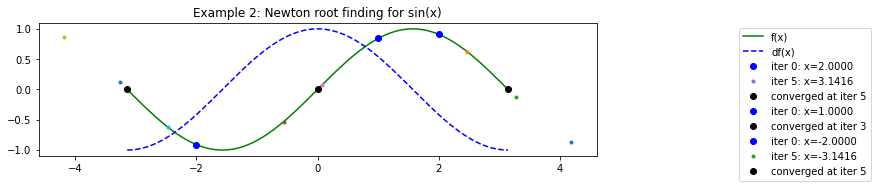

Roots: 3.141593, -0.000096, -3.141593


In [247]:
# Initial guesses
x0_arr = [2.0, 1.0, -2.0]

# Parameters for Newton: number of iterations,
# threshold for identifying a point as a zero
max_iters = 30
threshold = 0.0001

# Set up plot
fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect='equal', adjustable='box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

roots = []
for x0 in x0_arr:
    i = 0;
    xi = x0
    fxi = fx_sin(xi)
    # Plot initial data point
    plt.plot(xi, fxi, 'bo', label=("iter 0: x=%.4f" % x0))
    while i < max_iters:
        # x_i+1 = x_i - f(x_i)/f'(x_i)
        xi = xi - fx_sin(xi) / fx_dsin(xi)
        fxi = fx_sin(xi)
        # Plot (xi, fxi) and add a legend entry every 5 iterations
        if (i+1) % 5 == 0:
            plt.plot(xi, fxi, '.', label=("iter %d: x=%.4f" % (i+1, xi)))
        else:
            plt.plot(xi, fxi, '.')        
        # Check if |f(x)| < threshold        
        if np.abs(fxi) < threshold:
            roots.append(xi)
            break
        i = i + 1
    plt.plot(xi, fx_sin(xi), 'ko', label=("converged at iter %d" % (i+1)))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
plt.title('Example 2: Newton root finding for sin(x)')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))

Notice that we get some extreme values of x for some cases. For example, when $x_0 = -2$, where
the slope is pretty close to 0, the next iteration gives a value less than -4.

## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}^{-1}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}^{-1}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix} .$$

Generate 100 samples for each of the classes, guided by the following exercises.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples:

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [248]:
np.random.seed(10)
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = np.diag([sigma_1]*2)
X1 = np.random.multivariate_normal(mu_1, cov_mat, num_sample)

In [249]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[ 2.3315865   2.71527897]
 [-0.54540029  1.99161615]
 [ 1.62133597  1.27991444]
 [ 1.26551159  2.10854853]
 [ 1.00429143  1.82539979]]
success!


**Expected result (or something similar):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples:

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$

where $\theta$ is sampled uniformly from
$[0, 2\pi]$ and $d$ is sampled from a one-dimensional Gaussian
with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate these samples.
</details>

In [250]:
import math

# 1. Create sample angle from 0 to 2pi with 100 samples
angle = np.random.uniform(0,2 * np.pi,100)
# 2. Create sample with normal distribution of d with mean and variance
d =  np.random.normal(math.pow((3*sigma_1),2),math.pow((0.5*sigma_1),2),100)
# 3 Create X2
X2 = np.array([X1[:,0] + d * np.cos(angle), X1[:,1] + d * np.sin(angle)]).T


In [251]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [5.30689682 3.38128057 3.51284419 0.76975292 2.37279415]
d: [9.25349616 8.75745054 9.30429539 9.04566184 8.6825451 ]
X2: [[ 7.51447991 -4.95054173]
 [-9.0524938  -0.08739805]
 [-7.04909538 -2.09551632]
 [ 7.76104443  8.40394774]
 [-5.23625798  7.86213173]]
success!


**Expected result (or something similar):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [252]:
# 1. concatenate X1, X2 together
X = np.concatenate((X1,X2),axis=0)
# 2. Create y with class 1 as 0 and class 2 as 1
y = np.concatenate((np.zeros((100,1)),np.ones((100,1))),axis=0)


In [253]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200, 1)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

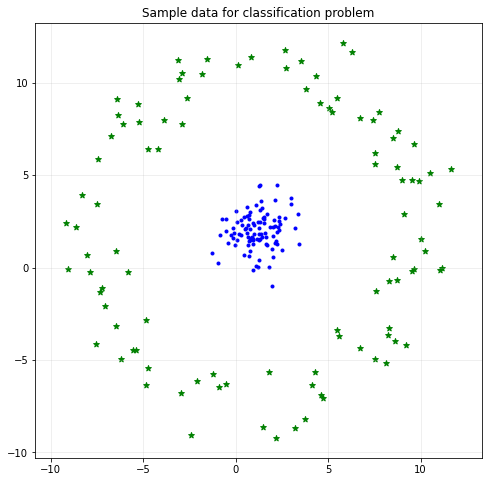

In [254]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.scatter(X1[:,0],X1[:,1], c='b', marker='.', label='Class 1')
plt.scatter(X2[:,0],X2[:,1], c='g', marker='*', label='Class 1')
# end plot graph
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

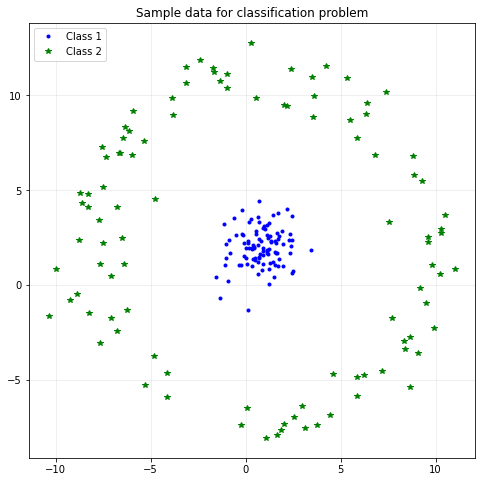

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [255]:
import random

train_size = 0.8

m, n = X.shape
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * train_size)

idx_train = idx[0:m_train]
idx_test = idx[m_train:]

X_train = X[idx_train,:];
X_test = X[idx_test,:];
y_train = y[idx_train];
y_test = y[idx_test];


In [256]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [ 65 119  85  25 173 188 107  17  44 163]
train size, X: (160, 2) , y: (160, 1)
test size,  X: (40, 2) , y: (40, 1)
success!


**Expected reult (or something similar):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write a function to normalize your $\mathtt{X}$ data

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook's LaTeX equation capabilities to write the normalization equations for your dataset.

$$normalization=\frac{X - \mu}{\sigma}$$

In [257]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    X_norm = (X - means) / stds
    return X_norm

In [258]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [259]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1/(1 + np.exp(-z))
        return s

    def softmax(self, z):
        sm = np.exp(z)/np.sum(np.exp(z))
        return sm
    
    def h(self,X, theta):
        z = np.dot(X,theta)
        hf = self.sigmoid(z)
        return hf
    
    def gradient(self, X, y, y_pred):
        n = len(y)
        grad = -np.dot(X.T,((y-y_pred)/n))
        return grad
        
    def costFunc(self, theta, X, y):
        n = len(y)
        y_pred = self.h(X,theta)
        cost = np.sum((-y*np.log(y_pred))-((1-y)*np.log(1-y_pred)))/n
        grad = self.gradient(X,y,y_pred)
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = self.costFunc(theta,X,y)
            # 2. update new theta
            theta = theta - alpha*grad
            
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        y_pred = self.h(X, theta)
        # 2. classify y_predict that what it should be class1 or class2
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
        # 3. append the output from prediction       
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        
        m = len(y)
        y_pred = self.predict(X,theta)
        count = 0
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                count = count + 1

        accuracy = count/m
        percent_correct = accuracy * 100
        return percent_correct

In [260]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [0.8719249134773479, 0.870441756946089, 0.8689666485816598]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expected result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [261]:
alpha = 0.001
iterations = 50000

m,n = X_design_train.shape

BGD_model = Logistic_BGD()
initial_theta = np.zeros((n,1))
print(initial_theta)
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)

[[0.]
 [0.]
 [0.]]
Minimum at iteration: 49999


[[-0.11166426]
 [ 0.24830367]
 [ 0.04253917]]
50000
0.6931471805599453


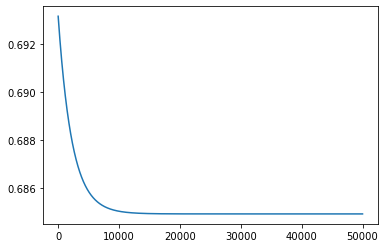

success!


In [262]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expected result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

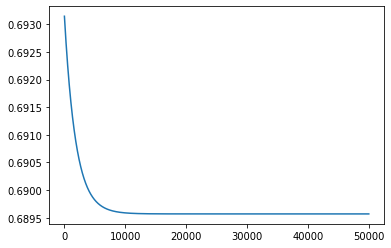

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

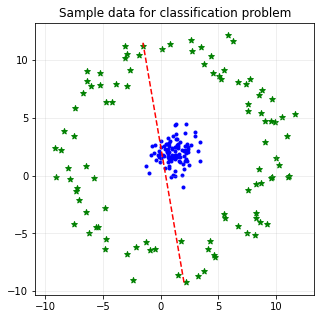

In [263]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.scatter(X1[:,0],X1[:,1], c='b', marker='.', label='Class 1')
plt.scatter(X2[:,0],X2[:,1], c='g', marker='*', label='Class 1')

point_1, point_2 = boundary_points(X, bgd_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
# end plot graph
plt.axis('equal')
plt.show()

**Expected result (or look alike):**\
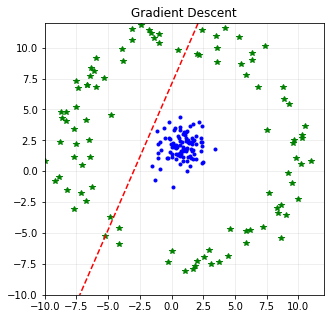

In [264]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 60.0


### Exercise 2.1 (10 points)

Write Newton's method class

In [265]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1/(1 + np.exp(-z))
        return s

    def h(self,X, theta):
        z = np.dot(X,theta)
        hf = self.sigmoid(z)
        return hf

    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = 1/m * np.dot(X.T, (y_pred-y))
        return grad
        
    def hessian(self, X, y, theta):
        y_pred = self.h(X,theta)
        S= np.diag(np.dot(y_pred.T,(1 - y_pred)))/len(y)
        hess_mat = np.dot(X.T,X) * S
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        n = len(y)
        y_pred = self.h(X,theta)
        cost = np.sum((-y*np.log(y_pred))-((1-y)*np.log(1-y_pred)))/n
        grad = self.gradient(X,y,y_pred)
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            hess_mat = self.hessian(X,y,theta)
            cost , grad = self.costFunc(theta, X, y)
            theta = theta - np.dot(np.linalg.inv(hess_mat),grad)
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        y_pred = self.h(X, theta)
        # 2. classify y_predict that what it should be class1 or class2
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
        # 3. append the output from prediction       
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        m = len(y)
        y_pred = self.predict(X,theta)
        count = 0
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                count = count + 1

        accuracy = count/m
        percent_correct = accuracy * 100
        return percent_correct

In [266]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[12.17334371  6.55487738]
 [ 6.55487738 14.84880387]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.14765747 0.15607017]]
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845246]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [[-0.11141726]
 [ 0.24773811]
 [ 0.04243789]]
0.6931471805599453


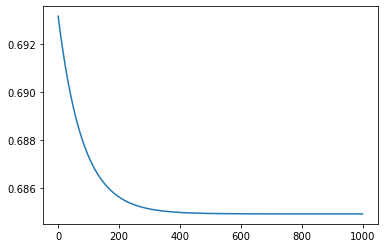

In [267]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expected result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

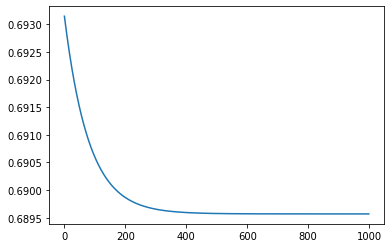

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

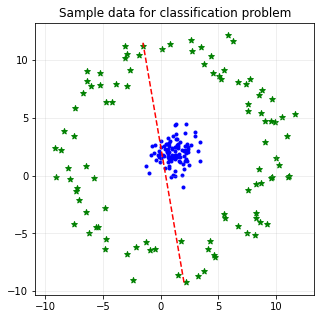

In [268]:
fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.scatter(X1[:,0],X1[:,1], c='b', marker='.', label='Class 0')
plt.scatter(X2[:,0],X2[:,1], c='g', marker='*', label='Class 1')

point_1, point_2 = boundary_points(X, nm_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'r--')
# end plot graph
plt.axis('equal')
plt.show()

**Expected result (or look alike):**

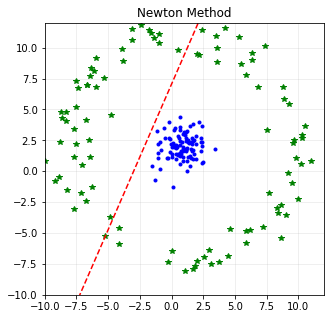

In [269]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 60.0


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

From the graphs plotted for gradient descent and newton's method, we can see that we obtain the minimum cost in much lesser iterations for newton's method compared to the gradient descent.

For this exercise, we did not get singular or nearly singular Hessian matrix but if we get singular Hessian matrix then we would not be able to get the inverse of the matrix because the determinant would be zero for singular matrix. As a result we wont be able to use newton's method for the exercise.



## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




Text(0, 0.5, 'radius')

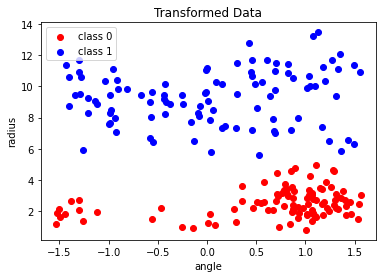

In [270]:
#polar transformation of data set
#converting X to radius and angle
import math

# Converting cartesian to polar coordinate
# Calculating radius
radius = np.sqrt( (X[:,0].reshape(-1,1)) **2 + (X[:,1].reshape(-1,1)) **2 )
# Calculating angle (theta) in radian
theta = np.arctan(X[:,1]/X[:,0])


# for i in range(radius.shape[0]):
X_new = np.insert(radius, 0, theta.T, axis=1) 
X_new = np.insert(X_new, 0, 1, axis=1)

#plotting the graph
plt.title('Transformed Data')
plt.scatter(X_new[:100,1], X_new[:100,2], c='r', label='class 0')
plt.scatter(X_new[100:,1], X_new[100:,2], c='b', label='class 1')
plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')

In [271]:
X_new_train = X_new[idx_train]
X_new_test = X_new[idx_test]

alpha = 0.01
iterations = 15000

m,n = X_design_train.shape

BGD_model = Logistic_BGD()
initial_theta = np.zeros((n,1))

bgd_theta, bgd_cost = BGD_model.gradientAscent(X_new_train, y_train, initial_theta, alpha, iterations)

Minimum at iteration: 14999


In [272]:
NM_model = Logistic_NM()

iterations = 5000

nm_theta, nm_cost = NM_model.newtonsMethod(X_new_train, y_train, initial_theta, iterations)

Minimum at iteration: 4999


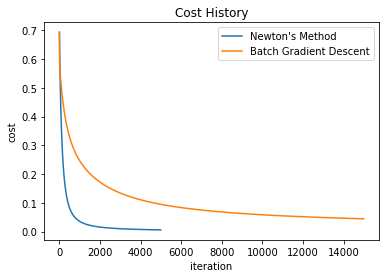

In [273]:
plt.plot(nm_cost, label='Newton\'s Method')
plt.plot(bgd_cost, label='Batch Gradient Descent')
plt.title('Cost History')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.show()

Text(0, 0.5, 'radius')

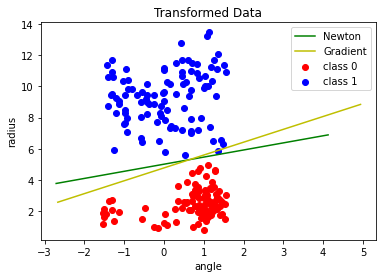

In [274]:
plt.title('Transformed Data')
plt.scatter(X_new[:100,1], X_new[:100,2], c='r', label='class 0')
plt.scatter(X_new[100:,1], X_new[100:,2], c='b', label='class 1')

point_1, point_2 = boundary_points(X_new[:,1:], nm_theta)
point_grad_1, point_grad_2 = boundary_points(X_new[:,1:], bgd_theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-' , label='Newton')
plt.plot([point_grad_1[0,0], point_grad_2[0,0]],[point_grad_1[1,0], point_grad_2[1,0]], 'y-', label='Gradient')

plt.legend()
plt.xlabel('angle')
plt.ylabel('radius')

In [275]:
print("Accuracy =",BGD_model.getAccuracy(X_new_test,y_test,bgd_theta))
print("Accuracy =",NM_model.getAccuracy(X_new_test,y_test,nm_theta))

Accuracy = 97.5
Accuracy = 100.0


After doing the polar transformation, the accuracy for logistic regression with GD was found around 97% - 100% and accuracy for Netwon's method was found around 100%. So we obtained better accuracy after the transformation.

## The report

Write a brief report covering your experiments (both in lab and take home) and submit the Jupyter notebook via JupyterHub at https://puffer.cs.ait.ac.th before the next lab.

In your solution, be sure to follow instructions!

Using the Loan Prediction Data Set from Lab 03

In [276]:
import pandas as pd

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')


print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)

print(data_train['Married'].value_counts())


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [277]:
#For martial_status
def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)

#For dependent_status
def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

# Convert category value "3+" to "4"
data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

#For loan amount
loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

#Data cleaning for Gender

def fill_gender_status(data, male_num_train, female_num_train):        
    data['Gender'].fillna('Male', inplace = True, limit = male_num_train)
    data['Gender'].fillna('Female', inplace = True, limit = female_num_train)  

fill_gender_status(data_train, 11, 2)
fill_gender_status(data_test, 9, 2)

#Filling the spaces with median value

LoanAmtTerm = data_train['Loan_Amount_Term'].value_counts()
loan_amount_term_median = data_train["Loan_Amount_Term"].median()

data_train['Loan_Amount_Term'].fillna(loan_amount_term_median, inplace=True, limit = 14)
data_test['Loan_Amount_Term'].fillna(loan_amount_term_median, inplace=True, limit = 6)

#Data cleaning for Sef Employed


self_employed = data_train['Self_Employed'].value_counts()

def fill_self_employed_data(data, yes_num_train, no_num_train):        
    data['Self_Employed'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Self_Employed'].fillna('No', inplace = True, limit = no_num_train)  

fill_self_employed_data(data_train, 5, 27)
fill_self_employed_data(data_test, 3, 20)

#Data cleaning for Credit history

def fill_credit_history_data(data, true_num_train, false_num_train):        
    data['Credit_History'].fillna(1, inplace = True, limit = true_num_train)
    data['Credit_History'].fillna(0, inplace = True, limit = false_num_train)  

fill_credit_history_data(data_train, 42, 8)
fill_credit_history_data(data_test, 24, 5)

In [278]:
#preparing data for logistic regression
# Converting gender variable with numerical (male is 1 and female is 0)

data_train['Gender'].replace('Male', 1, inplace = True)
data_train['Gender'].replace('Female', 0, inplace = True)
data_test['Gender'].replace('Male', 1, inplace = True)
data_test['Gender'].replace('Female', 0, inplace = True)

# Converting Married variable with numerical (Yes is 1 and No is 0)

data_train['Married'].replace('Yes', 1, inplace = True)
data_train['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)
data_test['Married'].replace('No', 0, inplace = True)


# Converting Education variable with numerical (Graduate is 1 and Not Graduate is 0)

data_train['Education'].replace('Graduate', 1, inplace = True)
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)
data_test['Education'].replace('Not Graduate', 0, inplace = True)

# Converting Self_Employed variable with numerical (Yes is 1 and No is 0)

data_train['Self_Employed'].replace('Yes', 1, inplace = True)
data_train['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)
data_test['Self_Employed'].replace('No', 0, inplace = True)

# Converting Property_Area variable with numerical (Rural is 0 Semiurban is 1 and Urban is 2)

data_train['Property_Area'].replace('Rural', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Urban', 2, inplace = True)

data_test['Property_Area'].replace('Rural', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Urban', 2, inplace = True)

# Converting Loan_Status variable with numerical (Y is 1 and N is 0)

data_train['Loan_Status'].replace('Y', 1, inplace = True)
data_train['Loan_Status'].replace('N', 0, inplace = True)

# Converting Dependents variable string with numerical ('1' is 1, '2' is 2, '4' is 3)

data_train['Dependents'].replace('0', 0, inplace = True)
data_train['Dependents'].replace('1', 1, inplace = True)
data_train['Dependents'].replace('2', 2, inplace = True)
data_train['Dependents'].replace('4', 3, inplace = True)

data_test['Dependents'].replace('0', 0, inplace = True)
data_test['Dependents'].replace('1', 1, inplace = True)
data_test['Dependents'].replace('2', 2, inplace = True)
data_test['Dependents'].replace('4', 3, inplace = True)

# removing loan ID 
data_train=data_train.drop(['Loan_ID'],axis = 1)
data_test=data_test.drop(['Loan_ID'],axis = 1)


print(data_test)
print(data_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          1              0             5720   
1         1        1           1          1              0             3076   
2         1        1           2          1              0             5000   
3         1        1           2          1              0             2340   
4         1        0           0          0              0             3276   
..      ...      ...         ...        ...            ...              ...   
362       1        1           4          0              1             4009   
363       1        1           0          1              0             4158   
364       1        0           0          1              0             3250   
365       1        1           0          1              0             5000   
366       1        0           0          1              1             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [279]:
#seperating X and y in train data
data_train = np.array(data_train)
X = data_train[:,:-1]
y = data_train[:,-1]
X = np.insert(X, 0, 1, axis=1)
m ,n = X.shape

#Dividing given training set to get validation set 
percent_train = .7
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
validation_idx = idx[m_train:]

X_train = X[train_idx,:]
X_validation = X[validation_idx,:]

y_train = y[train_idx].reshape(-1,1)
y_validation = y[validation_idx]


Minimum at iteration: 4999


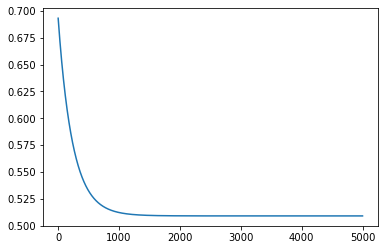

In [280]:
NM_model = Logistic_NM()

iterations = 5000
initial_theta = np.zeros((n,1))

nm_theta, nm_cost = NM_model.newtonsMethod(X_train, y_train, initial_theta, iterations)

#plotting the cost graph
plt.plot(nm_cost)
plt.show()

In [281]:
print("Accuracy =",NM_model.getAccuracy(X_validation,y_validation,nm_theta))

Accuracy = 85.4054054054054


In [282]:
#predicting the y using data_test
test = np.array(data_test)
test = np.insert(test, 0, 1, axis=1)
y_pred_test = NM_model.predict(test, nm_theta)
print(y_pred_test[:10])


[1 1 1 1 1 1 1 0 1 1]


(429, 12)


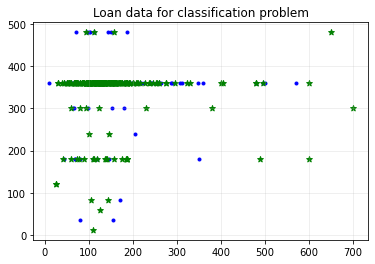

In [283]:
print(X_train.shape)
X_0 = []
X_1 = []
for i in range(len(y_train)):
    if y_train[i] == 0:
        X_0.append(X_train[i])
    else:
        X_1.append(X_train[i])
X_0=np.array(X_0)
X_1=np.array(X_1)
ax = plt.axes() 
plt.title('Loan data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.scatter(X_0[:,8],X_0[:,9], c='b', marker='.', label='Class 0')
plt.scatter(X_1[:,8],X_1[:,9], c='g', marker='*', label='Class 1')


In the lab exercise, we used both Gradient Descent and Newton's method to train the model for logistic regression. We observed that we reached minimum cost in less iteration for newton's method. However, we found the accuracy for both methods similar and low for this dataset.

Furthermore, we performed polar transformation of the data set to make it linearly separable. The gradient descent and newton's method was used to train model using the transformed data. The accuracy increased tremendously and was in range of 97 - 100% for both methods. We plot the boundaries for the above methods, which depicts how well the classification is done.

For the take home exercise we used the loan data set used in lab 3 to perform Newton's method. At first, we cleaned and prepared the dataset. Then we split the data set into train and validation set. We used the training set to train the model and using the validation set we calculated the accuracy of the model which was found around 80 %. Finally we predicted the y values for the given test data
set. The cost graph was plotted but the scatter plot using two features did not give much idea of the model.

